<a href="https://colab.research.google.com/github/Matheus-Missias/MDAEL8/blob/main/MineracaoDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Git hub eder
https://github.com/antisocialedin/Bank-Data-Set

In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Funções
def UpdateMissingValues(df, column, method, number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

Atividade 1:

*   Limpeza dos dados
*   names = Atualizar o nome das variáveis
*   features = Escolher as variáveis que vamos utilizar
*   esccolher o tipo de ação que vamos optar para substituir os valores ausentes

In [ ]:
# Faz a leitura do arquivo
names = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
         'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
         'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer',
         'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
features = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
         'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
         'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer',
         'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer.csv'
output_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer_saida.csv'
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                 names = names,      # Nome das colunas 
                 usecols = features, # Define as colunas que serão  utilizadas
                 na_values='?',
                 sep=',')            # Define que ? será considerado valores ausentes
    
#identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

df_original = df.copy()
# # Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n")        

# # Imprime informações sobre dos dados
print("INFORMAÇÕES GERAIS DOS DADOS\n")
print(df.info())
print("\n")
    
# # Imprime uma analise descritiva sobre dos dados
print("DESCRIÇÃO DOS DADOS\n")
print(df.describe())
print("\n")

# # Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
print(df.isnull().sum())
print("\n")    

columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'mode' # number or median or mean or mode

#para esse caso como os dados não são numéricos o melhor método de subst é a moda
#nas opções disponiveis/opções válidas para dados numéricos

for c in columns_missing_value:
    UpdateMissingValues(df, c, method='mode')
    
# print(df.describe())
# print("\n")
# print(df.head(15))
# print(df_original.head(15))
# print("\n")
    
# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file, header=False, index=False)

PRIMEIRAS 15 LINHAS

    Age  Number of sexual partners  First sexual intercourse  \
0    18                        4.0                      15.0   
1    15                        1.0                      14.0   
2    34                        1.0                       NaN   
3    52                        5.0                      16.0   
4    46                        3.0                      21.0   
5    42                        3.0                      23.0   
6    51                        3.0                      17.0   
7    26                        1.0                      26.0   
8    45                        1.0                      20.0   
9    44                        3.0                      15.0   
10   44                        3.0                      26.0   
11   27                        1.0                      17.0   
12   45                        4.0                      14.0   
13   44                        2.0                      25.0   
14   43            

Depois de realizado a limpeza

In [ ]:
# Faz a leitura do arquivo
names = ['Age',	'Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)',	
         'Hormonal Contraceptives',	'Hormonal Contraceptives (years)',	'IUD',	'IUD (years)',	'STDs',	'STDs (number)',	'STDs:condylomatosis',	
         'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',	'STDs:vulvo-perineal', 'condylomatosis',	'STDs:syphilis',	'STDs:pelvic inflammatory disease',	
         'STDs:genital herpes',	'STDs:molluscum contagiosum',	'STDs:AIDS',	'STDs:HIV',	'STDs:Hepatitis B',	'STDs:HPV',	'STDs: Number of diagnosis',	'STDs: Time since first diagnosis',
         'STDs: Time since last diagnosis',	'Dx:Cancer',	'Dx:CIN',	'Dx:HPV',	'Dx',	'Hinselmann',	'Schiller',	'Citology',	'Biopsy']
features = ['Age',	'Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)']
target = 'Hinselmann'
input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer_saida.csv'
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                 names = names,      # Nome das colunas 
                 na_values='?')[features]      # Define que ? será considerado valores ausentes
    
df_original = df.copy()
# # Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n")    

PRIMEIRAS 15 LINHAS

    Age  Number of sexual partners  First sexual intercourse  \
0   Age  Number of sexual partners  First sexual intercourse   
1    18                        4.0                      15.0   
2    15                        1.0                      14.0   
3    34                        1.0                      15.0   
4    52                        5.0                      16.0   
5    46                        3.0                      21.0   
6    42                        3.0                      23.0   
7    51                        3.0                      17.0   
8    26                        1.0                      26.0   
9    45                        1.0                      20.0   
10   44                        3.0                      15.0   
11   44                        3.0                      26.0   
12   27                        1.0                      17.0   
13   45                        4.0                      14.0   
14   44            

Atividade 2:
*   Técnica de normalização de dados;
*   Técnica PCA e plotar os dois principais componentes;

DataDescriptive

In [ ]:
#DATADESCRIPTIVE
import pandas as pd
import numpy as np
names = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
         'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
         'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer',
         'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
features = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
         'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
         'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer',
         'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
target = 'Hinselmann'
input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer_saida.csv'

def main():
    # Faz a leitura do arquivo
    names = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
         'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
         'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer',
         'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
    features = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives','Hormonal Contraceptives (years)','IUD','IUD (years)',
         'STDs','STDs (number)','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease',
         'STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:Cancer',
         'Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology','Biopsy']
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer_saida.csv'
    df = pd.read_csv(input_file,         # Nome do arquivo com dados
                 names = names,      # Nome das colunas 
                 usecols = features, # Define as colunas que serão  utilizadas
                 na_values='?',
                 sep=',')            # Define que ? será considerado valores ausentes
    
    #media 
    print('Média')
    print(df.mean())
    print('\n\n')

    #median
    print('Mediana')
    print(df.median())
    print('\n\n')

    #quatil
    print('Quantil')
    print(df.quantile())
    print('\n')
    print('Quantil 25%')
    print(df.quantile(q=0.25))
    print('\n\n')

    #moda
    print('Moda')
    print(df.mode())
    print('\n\n')


    #Medidas de dispersão
    # Amplitude
    print('Amplitude')
    ampl = df.max() - df.min()
    print(ampl)
    print('\n\n')

    #Variância
    print('Variância')
    print(df.var())
    print('\n\n')

    #Desvio Padrão
    print('Desvio padrão')
    print(df.std())
    print('\n\n')

    #Desvio absoluto
    print('Desvio absoluto')
    print(df.mad())
    print('\n\n')

    #Covariância e Correlação
    print('Covariância')
    print(df.cov())
    print('\n')
    print('Correlação')
    print(df.corr())
    print('\n')

if __name__ == "__main__":
    main()

Média
Age                                   26.820513
Number of sexual partners              2.511655
First sexual intercourse              16.979021
Num of pregnancies                     2.192308
Smokes                                 0.143357
Smokes (years)                         1.201241
Smokes (packs/year)                    0.446278
Hormonal Contraceptives                0.686480
Hormonal Contraceptives (years)        1.972394
IUD                                    0.096737
IUD (years)                            0.444604
STDs                                   0.092075
STDs (number)                          0.155012
STDs:condylomatosis                    0.051282
STDs:cervical condylomatosis           0.000000
STDs:vaginal condylomatosis            0.004662
STDs:vulvo-perineal condylomatosis     0.050117
STDs:syphilis                          0.020979
STDs:pelvic inflammatory disease       0.001166
STDs:genital herpes                    0.001166
STDs:molluscum contagiosum        

DataNormalization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def main():
    # Faz a leitura do arquivo
    names = ['Age',	'Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)',	
         'Hormonal Contraceptives',	'Hormonal Contraceptives (years)',	'IUD',	'IUD (years)',	'STDs',	'STDs (number)',	'STDs:condylomatosis',	
         'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',	'STDs:vulvo-perineal', 'condylomatosis',	'STDs:syphilis',	'STDs:pelvic inflammatory disease',	
         'STDs:genital herpes',	'STDs:molluscum contagiosum',	'STDs:AIDS',	'STDs:HIV',	'STDs:Hepatitis B',	'STDs:HPV',	'STDs: Number of diagnosis',	'STDs: Time since first diagnosis',
         'STDs: Time since last diagnosis',	'Dx:Cancer',	'Dx:CIN',	'Dx:HPV',	'Dx',	'Hinselmann',	'Schiller',	'Citology',	'Biopsy']
    features = ['Age',	'Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)']
    target = 'Hinselmann'
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer_saida.csv'
    df = pd.read_csv(input_file,    # Nome do arquivo com dados
                     names = names) # Nome das colunas                      
    ShowInformationDataFrame(df,"Dataframe original")

    # Separating out the features
    x = df.loc[:, features].values
    
    # Separating out the target
    y = df.loc[:,[target]].values

    # Z-score normalization
    x_zcore = StandardScaler().fit_transform(x)
    normalized1Df = pd.DataFrame(data = x_zcore, columns = features)
    normalized1Df = pd.concat([normalized1Df, df[[target]]], axis = 1)
    ShowInformationDataFrame(normalized1Df,"Dataframe Z-Score Normalized")

    # Mix-Max normalization
    x_minmax = MinMaxScaler().fit_transform(x)
    normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
    normalized2Df = pd.concat([normalized2Df, df[[target]]], axis = 1)
    ShowInformationDataFrame(normalized2Df,"Dataframe Min-Max Normalized")


def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n")  


if __name__ == "__main__":
    main()

Dataframe original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null

DataReduction

Dataframe original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null

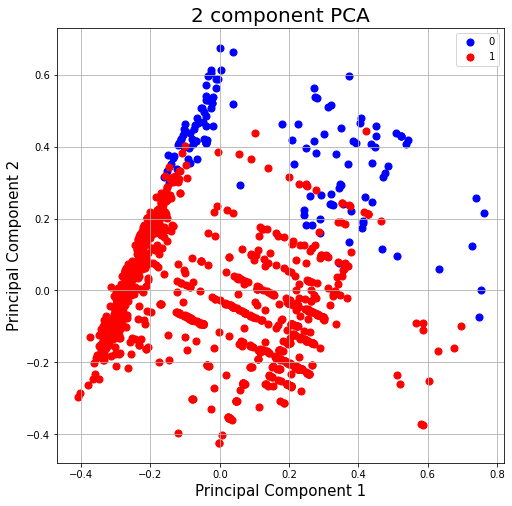

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def main():
     # Faz a leitura do arquivo
    names =[''] # Nome das colunas 
    features  = [''] # Define as colunas que serão  utilizadas
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer_clear.csv'
    target = ''
    df = pd.read_csv(input_file,    # Nome do arquivo com dados
                     names = names) # Nome das colunas                      
    ShowInformationDataFrame(df,"Dataframe original")

    # Separating out the features
    x = df.loc[:, features].values
    
    # Separating out the target
    y = df.loc[:,[target]].values

    # Standardizing the features
    x = MinMaxScaler().fit_transform(x)
    normalizedDf = pd.DataFrame(data = x, columns = features)
    normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
    ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")

    # PCA projection
    pca = PCA()    
    principalComponents = pca.fit_transform(x)
    print("Explained variance per component:")
    print(pca.explained_variance_ratio_.tolist())
    print("\n\n")

    principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                               columns = ['principal component 1', 
                                          'principal component 2'])
    finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
    ShowInformationDataFrame(finalDf,"Dataframe PCA")
    
    VisualizePcaProjection(finalDf, target)

def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n")
           
def VisualizePcaProjection(finalDf, targetColumn):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, ]
    colors = ['b', 'r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()


if __name__ == "__main__":
    main()

DataVisualization

Atividade 3:


*   Distribuição de frequência para alguns atributos da base de dados;
*   Técnica de visualização para analisar os dados com base na distribuição de frequência. (Histograma, Gráfico de setores, dispersão, etc.).

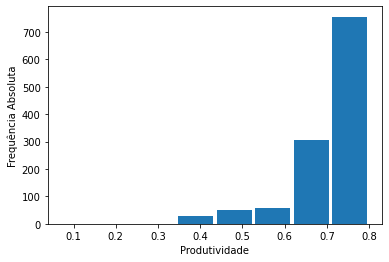

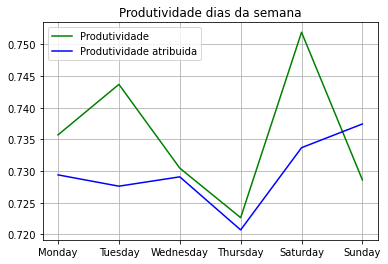

          day department  no_of_workers
0      Monday  finishing      10.361446
1      Monday     sweing      52.456897
2    Saturday  finishing       9.915663
3    Saturday     sweing      52.317308
4      Sunday  finishing      10.195402
5      Sunday     sweing      52.349138
6    Thursday  finishing      10.925926
7    Thursday     sweing      52.139831
8     Tuesday  finishing      10.156627
9     Tuesday     sweing      52.444915
10  Wednesday  finishing      10.000000
11  Wednesday     sweing      52.945378
          day department  no_of_workers
0      Monday  finishing      10.361446
1      Monday     sweing      52.456897
2    Saturday  finishing       9.915663
3    Saturday     sweing      52.317308
4      Sunday  finishing      10.195402
5      Sunday     sweing      52.349138
6    Thursday  finishing      10.925926
7    Thursday     sweing      52.139831
8     Tuesday  finishing      10.156627
9     Tuesday     sweing      52.444915
10  Wednesday  finishing      10.000000


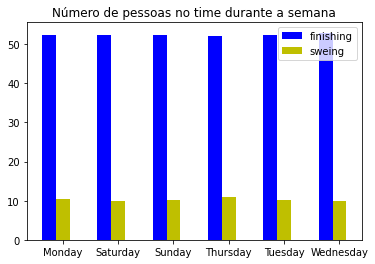

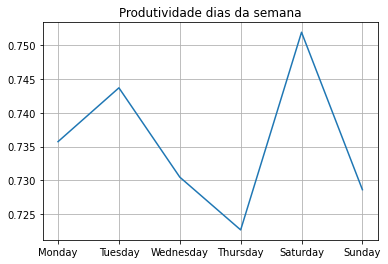

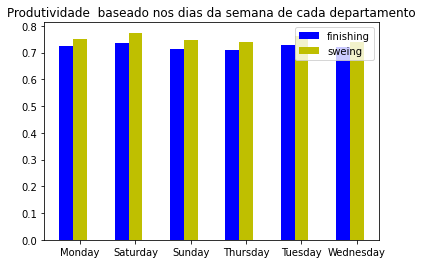

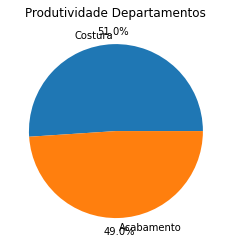

         date  actual_productivity
0  2015-01-01             0.718711
1  2015-01-03             0.802773
2  2015-01-04             0.780174
3  2015-01-05             0.796027
4  2015-01-06             0.805508
5  2015-01-07             0.766212
6  2015-01-08             0.760329
7  2015-01-10             0.771305
8  2015-01-11             0.749045
9  2015-01-12             0.755194
31 2015-01-13             0.755566
32 2015-01-14             0.705987
33 2015-01-15             0.758076
34 2015-01-17             0.730730
35 2015-01-18             0.677029
36 2015-01-19             0.713374
37 2015-01-20             0.697731
38 2015-01-21             0.722101
39 2015-01-22             0.674154
40 2015-01-24             0.748193
41 2015-01-25             0.775002
42 2015-01-26             0.800812
43 2015-01-27             0.793551
44 2015-01-28             0.707524
45 2015-01-29             0.791644
46 2015-01-31             0.854955
10 2015-02-01             0.784116
11 2015-02-02       

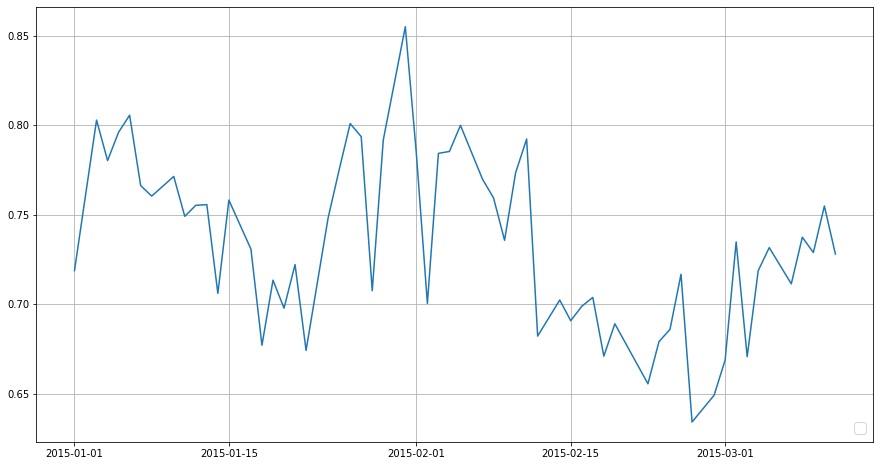

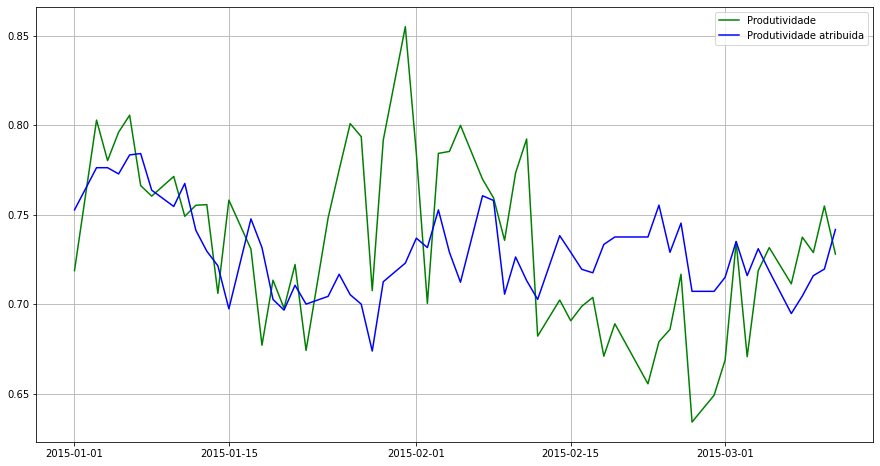

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Faz a leitura do arquivo
    names =[''] # Nome das colunas 
    features  = [''] # Define as colunas que serão  utilizadas
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer.csv'
    target = ''
    df = pd.read_csv(input_file,    # Nome do arquivo com dados
                     names = names) # Nome das colunas                      

    plt.title('')
    plt.xlabel('Produtividade')
    plt.ylabel('Frequência Absoluta')
    #rwidth é o tamanho relativo das barras. 
    plt.hist(df['targeted_productivity'], 8, rwidth=0.9)
    plt.show()

     #Número de pessoas no time durante a semana no_of_workers
    organiza = pd.DataFrame({
             'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Saturday', 'Sunday'],
             'num': [0, 1, 2, 3, 4, 5]})

    plt.title('Produtividade dias da semana')
    dados = df.groupby(['day']).actual_productivity.mean()
    dados = pd.merge(dados, organiza, on='day')
    dados = dados.sort_values('num')
    dados2 = df.groupby(['day']).targeted_productivity.mean()
    dados2 = pd.merge(dados2, organiza, on='day')
    dados2 = dados2.sort_values('num')
    plt.plot(dados['day'],dados['actual_productivity'],'g',label='Produtividade')
    plt.plot(dados2['day'],dados2['targeted_productivity'],'b',label='Produtividade atribuida')
    plt.legend()
    plt.grid()
    
    plt.show()
   
    #Número de pessoas no time durante a semana no_of_workers
    plt.title('Número de pessoas no time durante a semana')
    dados = df.groupby(['day','department']).no_of_workers.mean()
    dados = dados.reset_index()
    print(dados)
    y1 = dados.copy()
    y2 = dados.copy()
    indexY1 = y1[ y1['department'] == 'finishing' ].index
    y1.drop(indexY1 , inplace=True)
    indexY2 = y2[ y2['department'] == 'sweing' ].index
    y2.drop(indexY2 , inplace=True)
    
    x1 =  np.arange(len(y1['no_of_workers']))
    x2 = [x + 0.25 for x in x1]
    print(dados)
    plt.bar(x1, y1['no_of_workers'],  width=0.25, label = 'finishing', color = 'b')
    plt.bar(x2, y2['no_of_workers'],  width=0.25, label = 'sweing', color = 'y')
    plt.legend()
    plt.xticks([x + 0.25 for x in range(len( y1['no_of_workers']))], y2['day'])
    plt.show()

   
       
    #produtividade dias da semana
    organiza = pd.DataFrame({
             'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday',  'Saturday', 'Sunday'],
             'num': [0, 1, 2, 3, 4, 5]})

    plt.title('Produtividade dias da semana')
    dados = df.groupby(['day']).actual_productivity.mean()
    dados = pd.merge(dados, organiza, on='day')
    dados = dados.sort_values('num')
    plt.plot(dados['day'],dados['actual_productivity'])
    plt.grid()
    plt.show()


    #grafico comparativo produtividade baseado nos dias da semana de cada departamento
    plt.title('Produtividade  baseado nos dias da semana de cada departamento')
    dados = df.groupby(['day','department']).actual_productivity.mean()
    dados = dados.reset_index()
    y1 = dados.copy()
    y2 = dados.copy()
    indexY1 = y1[ y1['department'] == 'finishing' ].index
    y1.drop(indexY1 , inplace=True)
    indexY2 = y2[ y2['department'] == 'sweing' ].index
    y2.drop(indexY2 , inplace=True)
    
    x1 =  np.arange(len(y1['actual_productivity']))
    x2 = [x + 0.25 for x in x1]

    plt.bar(x1, y1['actual_productivity'],  width=0.25, label = 'finishing', color = 'b')
    plt.bar(x2, y2['actual_productivity'],  width=0.25, label = 'sweing', color = 'y')
    plt.legend()
    plt.xticks([x + 0.25 for x in range(len( y1['actual_productivity']))], y2['day'])
    plt.show()

    #grafico pizza produtividade
    plt.title('Produtividade Departamentos')
    labels = ['Costura', 'Acabamento']
    pizza = dados.groupby(['department']).actual_productivity.mean()
    plt.pie(pizza, autopct='%0.1f%%', pctdistance=1.15, labels=labels)
    plt.show()

    #produtividade meses
    dados = df.groupby(['date']).actual_productivity.mean()
    dados = dados.reset_index()
    dados['date'] = pd.to_datetime(dados['date'])
    dadosOrdenados = dados.sort_values(by='date')
    print(dadosOrdenados)
    plt.figure(figsize=(15,8))
    plt.legend(['Produtividade'], loc = 'lower right', fontsize=15)
    plt.plot(dadosOrdenados['date'], dadosOrdenados['actual_productivity']) 
    plt.grid()
    plt.show()

    #produtividade meses comparativa
    dados = df.groupby(['date']).actual_productivity.mean()
    dados = dados.reset_index()
    dados['date'] = pd.to_datetime(dados['date'])
    dadosOrdenados = dados.sort_values(by='date')
    dados2 = df.groupby(['date']).targeted_productivity.mean()
    dados2 = dados2.reset_index()
    dados2['date'] = pd.to_datetime(dados2['date'])
    dadosOrdenados2 = dados2.sort_values(by='date')
   
    plt.figure(figsize=(15,8))
    plt.legend(['Produtividade'], loc = 'lower right', fontsize=15)
    plt.plot(dadosOrdenados['date'], dadosOrdenados['actual_productivity'],'g',label='Produtividade')
    plt.plot(dadosOrdenados2['date'],dadosOrdenados2['targeted_productivity'],'b',label='Produtividade atribuida')
    plt.legend()
    plt.grid()
    plt.show()


if __name__ == "__main__":
    main()

K-means
*   Arrumar a função de importação da nossa base de dados


In [ ]:
#Implementação de Kmeans do scratch e usando sklearn
#Carregando as biblotecas necessárias
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

#Definindo a função Kmeans do Scratch
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Aleatoriza escolha de Centroides
    #Etapa 1
    centroids = x[idx, :]

    #Encontrando a distancia euclideana entre os centroides e todos os demais pontos
    #Etapa 2
    distances = cdist(x, centroids ,'euclidean')

    #Centroide com a distancia mínima
    #Etapa 3
    points = np.array([np.argmin(i) for i in distances])

    #Repetindo as etapas anteriores para definir o número de interações
    #Etapa 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Atualizando os Centroides tomando em média de cluster que pertence a
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Atualiza centros
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
    return points

def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  #Tamanho da figura em polegadas
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        #Rótulo da imagem com o valor alvo
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()

def plot_samples(projected, labels, title):
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

def main():
    #Faz a leitura do arquivo - Carregar a base de dados
    names = ['']
    features = ['']
    target = ''
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer.csv'
    df = pd.read_csv(input_file,         # Nome do arquivo com dados
                    names = names)       # Nome das colunas 

    #Separando as variaveis de saida
    x = df.loc[:, features].values
    
    #Separando as variaveis de saida
    y = df.loc[:,[target]].values

    # Standardizing the features
    x = MinMaxScaler().fit_transform(x)
    normalizedDf = pd.DataFrame(data = x, columns = features)
    normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)

    #Load dataset Digits
    #digits = load_digits()
    #show_digitsdataset(digits)

    #Transform the data using PCA
    pca = PCA(2)
   #projected = pca.fit_transform(digits.data)
    projected = pca.fit_transform(x)
    print(pca.explained_variance_ratio_)
   #print(digits.data.shape)
    print(df.shape)
    print(projected.shape)
   #plot_samples(projected, digits.target, 'Original Labels')
    plot_samples(projected, df.target, 'Original Labels')

    #Applying our kmeans function from scratch
    labels = KMeans_scratch(projected,6,5)

    #Visualizar os resultados
    plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

    #Applying sklearn kemans function
    kmeans = KMeans(n_clusters=6).fit(projected)
    print(kmeans.inertia_)
    centers = kmeans.cluster_centers_
    score = silhouette_score(projected, kmeans.labels_)
    print("For n_clusters = {}, silhouette score is {})".format(10, score))

    #Visualizar os resultados sklearn
    plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

    plt.show()

if __name__ == "__main__":
    main()

ValueError: ignored

Atividade 5: GMM

*   Arrumar a função para importação da base de dados

[0.14890594 0.13618771]
(1797, 64)
(1797, 2)
[0.15073095 0.12315694 0.08948128 0.09203507 0.11218142 0.0468971
 0.12872564 0.09527398 0.10827398 0.05324364]
[[  3.26713224  -8.39484512]
 [-15.03635276  11.27964445]
 [  1.56275755  21.98618797]
 [-12.49829049  -7.65180918]
 [ 22.19219902  -0.72427224]
 [  8.9902289  -21.17263438]
 [ -4.91169931   1.13914065]
 [ 15.76777211  13.12328473]
 [ -2.27825086 -16.79879886]
 [-21.8744       2.05081423]]


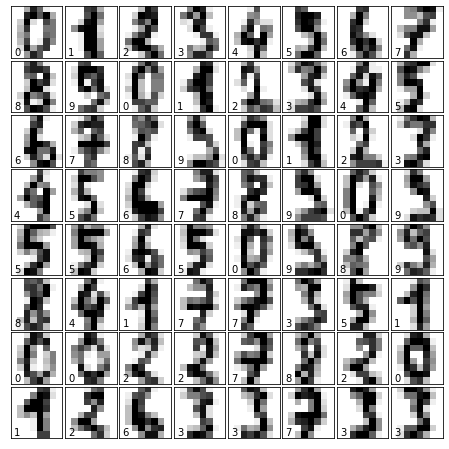

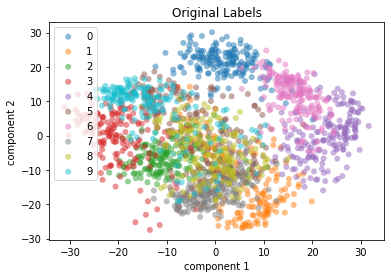

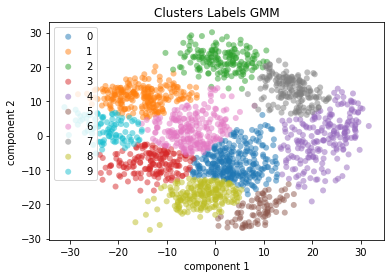

In [ ]:
#Implementação do GMM
#Carregando as bibliotecas
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits#
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  #Tamanho da figura
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        #Rótulo da imagem com o valor alvo
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()

def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

def main():
    
    #Faz a leitura do arquivo - Carregar a base de dados
    names = [''] 
    features = ['']
    target = ''
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer.csv'
    df = pd.read_csv(input_file,         # Nome do arquivo com dados
                    names = names)       # Nome das colunas 

    #Load dataset Digits
    #digits = load_digits()
    #show_digitsdataset(digits)
    
    #Transformar os dados usando PCA
    pca = PCA(2)
    projected = pca.fit_transform(digits.data)
    print(pca.explained_variance_ratio_)
    print(digits.data.shape)
    print(projected.shape)    
    plot_samples(projected, digits.target, 'Original Labels') 
    
    #Aplicando função sklearn GMM
    gm  = GaussianMixture(n_components=10).fit(projected)
    print(gm.weights_)
    print(gm.means_)
    x = gm.predict(projected)

    #Visualizar os resultados sklearn
    plot_samples(projected, x, 'Clusters Labels GMM')

    plt.show()

if __name__ == "__main__":
    main()

Aula - 28.04.2022, Algoritmo de arvore de decisão para classificação.

*   Adaptar para importar nossa base de dados

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

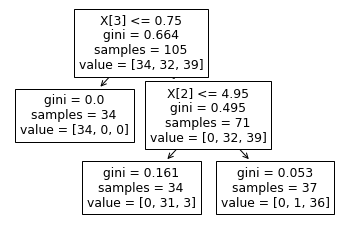

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]
Acuraccy:
0.9111111111111111


In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import StandardScaler

def main():
    #Faz a leitura do arquivo - Carregar a base de dados
    #names = [''] 
    #features = ['']
    #target = ''
    #input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer.csv'
    #df = pd.read_csv(input_file,         # Nome do arquivo com dados
    #                 names = names)       # Nome das colunas 
    
    iris = load_iris()
    print(iris.data)
    print(iris.target)
    X = iris.data
    y = iris.target
    
    # Split the data - 75% train, 25% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)    
    iris = load_iris()
    print(iris.data)
    print(iris.target)
    X = iris.data
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    clf = DecisionTreeClassifier(max_leaf_nodes=3)
    clf.fit(X_train, y_train)
    tree.plot_tree(clf)
    plt.show()
    
    predictions = clf.predict(X_test)
    print(predictions)
    
    result = clf.score(X_test, y_test)
    print('Acuraccy:')
    print(result)

if __name__ == "__main__":
    main()

Algoritmo aplicado a base mamo


In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import StandardScaler

def main():
    input_file = '/content/drive/My Drive/MDAEL8/Base de Dados/risk_factors_cervical_cancer.csv'
    names = ['Age',	'Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)',	
         'Hormonal Contraceptives',	'Hormonal Contraceptives (years)',	'IUD',	'IUD (years)',	'STDs',	'STDs (number)',	'STDs:condylomatosis',	
         'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',	'STDs:vulvo-perineal', 'condylomatosis',	'STDs:syphilis',	'STDs:pelvic inflammatory disease',	
         'STDs:genital herpes',	'STDs:molluscum contagiosum',	'STDs:AIDS',	'STDs:HIV',	'STDs:Hepatitis B',	'STDs:HPV',	'STDs: Number of diagnosis',	'STDs: Time since first diagnosis',
         'STDs: Time since last diagnosis',	'Dx:Cancer',	'Dx:CIN',	'Dx:HPV',	'Dx',	'Hinselmann',	'Schiller',	'Citology',	'Biopsy']
    features = ['Age',	'Number of sexual partners',	'First sexual intercourse',	'Num of pregnancies',	'Smokes',	'Smokes (years)',	'Smokes (packs/year)']
    target = 'Hinselmann'
    df = pd.read_csv(input_file,    # Nome do arquivo com dados
                     names = names) # Nome das colunas
   
    # Separating out the features
    X = df.loc[:, features].values
    print(X.shape)

    # Separating out the target
    y = df.loc[:,[target]].values

    # Standardizing the features
    X = StandardScaler().fit_transform(X)
    normalizedDf = pd.DataFrame(data = X, columns = features)
    normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print(X_train.shape)
    print(X_test.shape)

    clf = DecisionTreeClassifier(max_leaf_nodes=3)
    clf.fit(X_train, y_train)
    tree.plot_tree(clf)
    plt.show()
    
    predictions = clf.predict(X_test)
    print(predictions)
    
    result = clf.score(X_test, y_test)
    print('Acuraccy:')
    print(result)


if __name__ == "__main__":
    main()

(859, 7)


ValueError: ignored

Aula 12.05.2022
KNN
*   Verificar se o processo de normalização faz sentido para nossa base de dados
*   Verificar a quantidade de classificações da base de dados, tentar balancear a quantidade para os dados de treinamento.

Validação Cruzada
*   Realizar o procedimento de separação de dados de treinamento e teste algumas vezes (talvez 5), e verificar os resultados.
*   Implementação a parte do Cross-validation

Métricas de classificação
*   Matrix de confusão (classifica o tipo de erro, "exemplo: falso positivo e falso negativo").
*   Para matrix de confusão é interessante converter os valores em % no final

Principais Métricas: Precisão, ideal é ter o mínimo de falso negativo possível


**Atividade 6:**
1.   Fazer testes com a base de dados normaliazada e não-normalizada
2.   Algoritmo K-NN
2.1. Divisão da base de dados treinamento 70% e testes 30%
2.2. Cross validation k=10
3.   Classificar com K-NN e calcular as seguintes métricas:
3.1. Matrix de confusão
3.2. Acurácia
3.3. F1 Score


In [ ]:
KNN

Total samples: 150
Total train samples: 112
Total test  samples: 38
Acurracy K-NN from scratch: 97.37%
F1 Score K-NN from scratch: 0.97%
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]
Acurracy K-NN from sk-learn: 97.37%
F1 Score K-NN from sk-learn: 0.97%
Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]


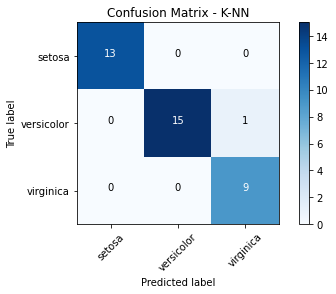

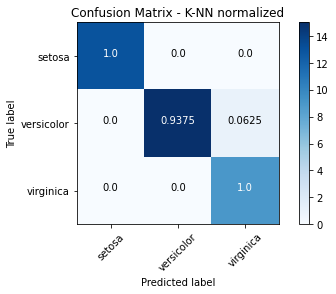

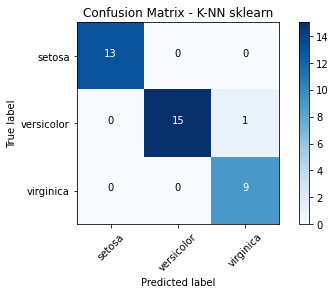

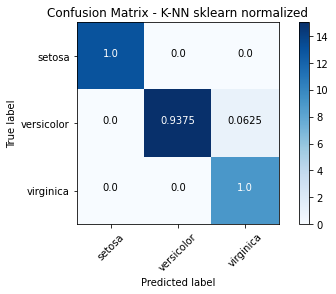

In [ ]:
# Initial imports
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

# Calculate distance between two points
def minkowski_distance(a, b, p=1):    
    # Store the number of dimensions
    dim = len(a)    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)    
    return distance


def knn_predict(X_train, X_test, y_train, y_test, k, p):    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    


def main():
    
    #Carrega a base de dados do professor:
    # Load iris data and store in dataframe
    #iris = datasets.load_iris()
    #df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    #df['target'] = iris.target
    #df.head()

    #Carrega a base de dados
    

    # Separate X and y data
    X = df.drop('target', axis=1)
    y = df.target   
    print("Total samples: {}".format(X.shape[0]))

    # Split the data - 75% train, 25% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    print("Total train samples: {}".format(X_train.shape[0]))
    print("Total test  samples: {}".format(X_test.shape[0]))

    # Scale the X data using Z-score
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
        
    # STEP 1 - TESTS USING knn classifier write from scratch    
    # Make predictions on test dataset using knn classifier
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)

    # Get test accuracy score
    accuracy = accuracy_score(y_test, y_hat_test)*100
    f1 = f1_score(y_test, y_hat_test, average='macro')
    print("Acurracy K-NN from scratch: {:.2f}%".format(accuracy))
    print("F1 Score K-NN from scratch: {:.2f}%".format(f1))

    # Get test confusion matrix
    cm = confusion_matrix(y_test, y_hat_test)        
    plot_confusion_matrix(cm, iris.target_names, False, "Confusion Matrix - K-NN")      
    plot_confusion_matrix(cm, iris.target_names, True, "Confusion Matrix - K-NN normalized")  

    # STEP 2 - TESTS USING knn classifier from sk-learn
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_hat_test = knn.predict(X_test)

     # Get test accuracy score
    accuracy = accuracy_score(y_test, y_hat_test)*100
    f1 = f1_score(y_test, y_hat_test,average='macro')
    print("Acurracy K-NN from sk-learn: {:.2f}%".format(accuracy))
    print("F1 Score K-NN from sk-learn: {:.2f}%".format(f1))

    # Get test confusion matrix    
    cm = confusion_matrix(y_test, y_hat_test)        
    plot_confusion_matrix(cm, iris.target_names, False, "Confusion Matrix - K-NN sklearn")      
    plot_confusion_matrix(cm, iris.target_names, True, "Confusion Matrix - K-NN sklearn normalized" )  
    plt.show()


if __name__ == "__main__":
    main()

In [ ]:
Implementação do Cross Validation (Atividade 6)

https://scikit-learn.org/stable/modules/cross_validation.html
